## Assignment: Multiple Assumptions

Use the model specified below and check the following assumptions:

1. Assess Linearity & fix if necessary
2. Assess Independence of Errors -- if violated stop here
3. Assess Normality of Errors & fix if necessary
4. Assess Multicollinearity & fix if necessary
5. Assess Equal Variance of Errors & fix if necessary
6. Determine if any influential points are in our data and fix if necessary

In [1]:
import pandas as pd
import seaborn as sns
import statsmodels.api as sm
import numpy as np

computers = pd.read_csv("../Data/Computers.csv")

computers.tail()

,price,speed,hd,ram,screen,cd,multi,premium,ads,trend
6254,1690,100,528,8,15,no,no,yes,39,35
6255,2223,66,850,16,15,yes,yes,yes,39,35
6256,2654,100,1200,24,15,yes,no,yes,39,35
6257,2195,100,850,16,15,yes,no,yes,39,35
6258,2490,100,850,16,17,yes,no,yes,39,35


### EDA

In [5]:
computers.corr(numeric_only=True)

,price,speed,hd,ram,screen,ads,trend
price,1.000000,0.300976,0.430258,0.622748,0.296041,0.054540,-0.199987
speed,0.300976,1.000000,0.372304,0.234760,0.189074,-0.215232,0.405438
hd,0.430258,0.372304,1.000000,0.777726,0.232802,-0.323222,0.577790
ram,0.622748,0.234760,0.777726,1.000000,0.208954,-0.181670,0.276844
screen,0.296041,0.189074,0.232802,0.208954,1.000000,-0.093919,0.188614
ads,0.054540,-0.215232,-0.323222,-0.181670,-0.093919,1.000000,-0.318553
trend,-0.199987,0.405438,0.577790,0.276844,0.188614,-0.318553,1.000000


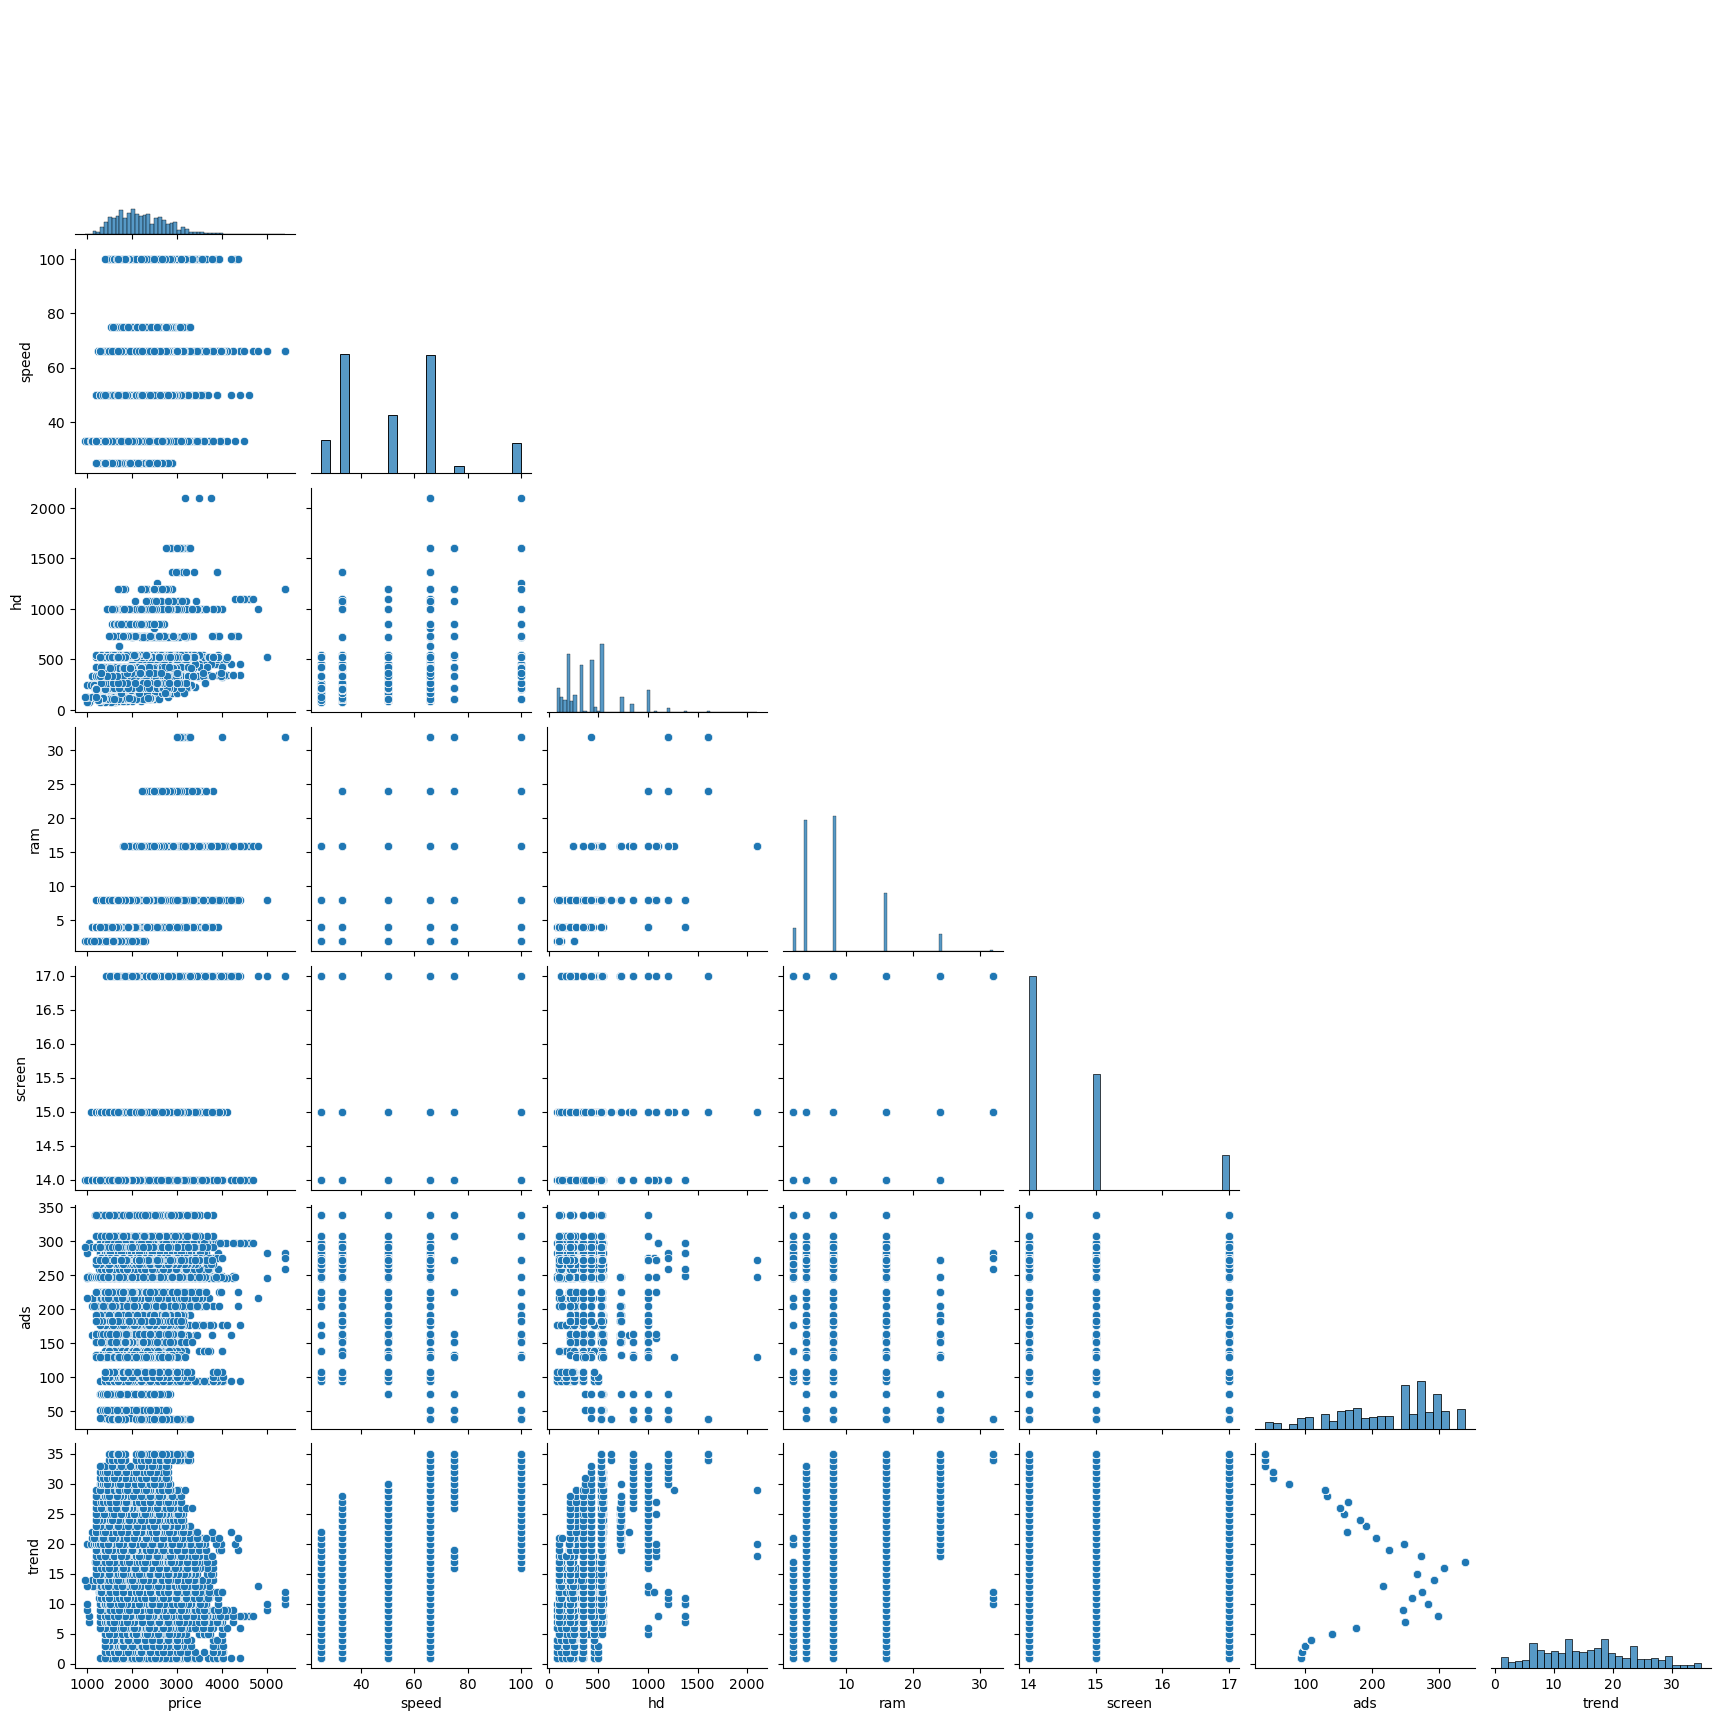

In [2]:
sns.pairplot(computers, corner=True)

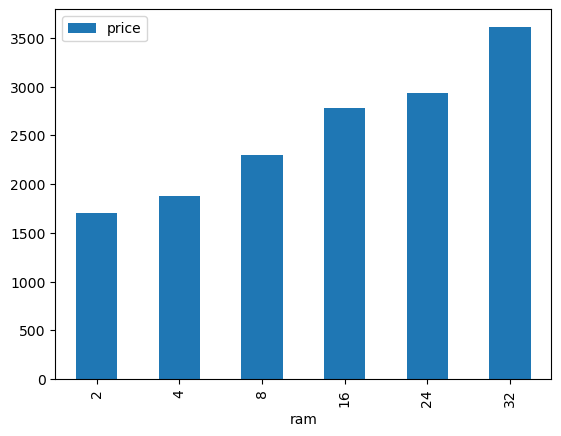

In [6]:
computers.groupby('ram').agg({'price':'mean'}).plot.bar();

### Model Fitting

In [7]:
cols = ["ram", "speed", "hd", "screen", "ads", "trend"]

X = sm.add_constant(computers[cols])
y = computers["price"]

model = sm.OLS(y, X).fit()

model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.712
Model:                            OLS   Adj. R-squared:                  0.712
Method:                 Least Squares   F-statistic:                     2580.
Date:                Tue, 07 Oct 2025   Prob (F-statistic):               0.00
Time:                        18:32:57   Log-Likelihood:                -44817.
No. Observations:                6259   AIC:                         8.965e+04
Df Residuals:                    6252   BIC:                         8.969e+04
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       -246.6755     66.371     -3.717      0.000    -376.785    -116.566
ram           47.3870      1.188     39.899      0.000      45.059      49.715
speed          8.8939      0.209     42.590      0.000       8.485       9.303
hd             0.7088      0.031     22.932      0.000       0.648       0.769
screen       126.7024      4.521     28.022      0.000     117.839     135.566
ads            0.9697      0.057     17.099      0.000       0.859       1.081
trend        -47.0820      0.676    -69.660      0.000     -48.407     -45.757
==============================================================================
Omnibus:                     1407.073   Durbin-Watson:                   1.948
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             3902.981
Skew:                           1.187   Prob(JB):                         0.00
Kurtosis:                       6.054   Cond. No.                     8.89e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 8.89e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

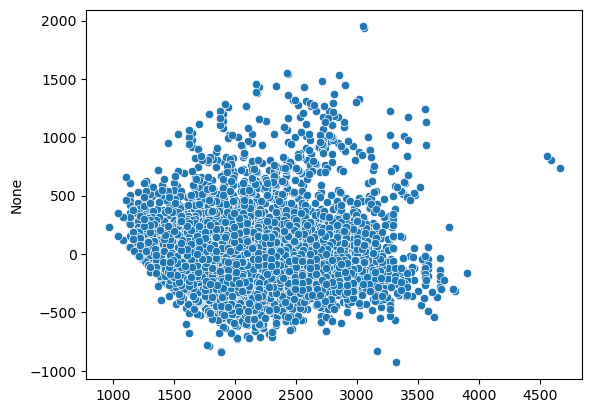

In [8]:
sns.scatterplot(x=model.predict(), y=model.resid);

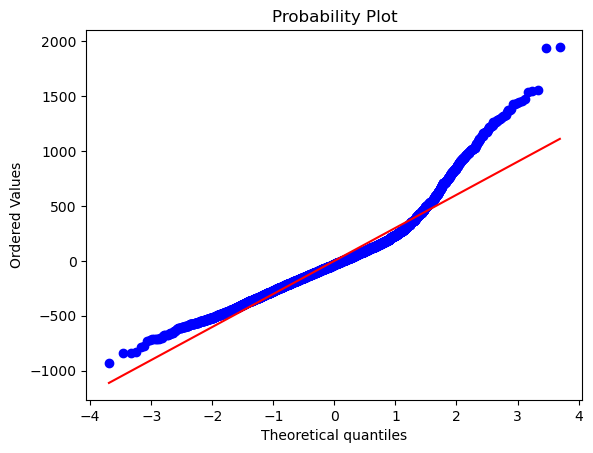

In [9]:
import scipy.stats as stats
import matplotlib.pyplot as plt

stats.probplot(model.resid, dist='norm', plot=plt);

In [11]:
### Residual plotter helper function

def residual_analysis_plots(model):
    
    import scipy.stats as stats
    import matplotlib.pyplot as plt
    
    predictions = model.predict()
    residuals = model.resid
    
    fig, ax = plt.subplots(1, 2, sharey="all", figsize=(10, 6))
    
    sns.scatterplot(x=predictions, y=residuals, ax=ax[0], alpha=.3)
    ax[0].set_title("Residual Plot")
    ax[0].set_xlabel("Prediction")
    ax[0].set_ylabel("Residuals")
    
    stats.probplot(residuals, dist="norm", plot=ax[1])
    ax[1].set_title("Normal Q-Q Plot")   

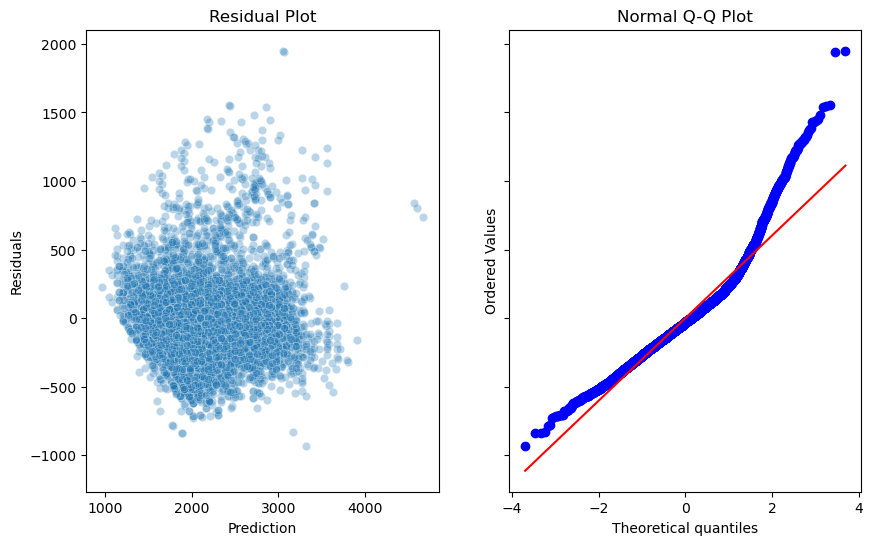

In [12]:
residual_analysis_plots(model)

In [13]:
computers = computers.assign(
    ram2 = computers['ram'] ** 2,
    hd2 = computers['hd'] ** 2,
    premium_flag = np.where(computers['premium'] == 'yes', 1, 0),
    multi_flag = np.where(computers['multi'] == 'yes', 1, 0),
    cd_flag = np.where(computers['cd'] == 'yes', 1, 0),
    trend2 = computers['trend'] ** 2
)

cols = [
    'ram',
    'ram2',
    'speed',
    'hd',
    'hd2',
    'screen',
    'ads',
    'trend',
    'trend2',
    'premium_flag',
    'multi_flag',
    'cd_flag'
]

X = sm.add_constant(computers[cols])
#y = computers['price']
y = np.log(computers['price'])

model = sm.OLS(y, X).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.804
Model:                            OLS   Adj. R-squared:                  0.804
Method:                 Least Squares   F-statistic:                     2138.
Date:                Tue, 07 Oct 2025   Prob (F-statistic):               0.00
Time:                        18:40:36   Log-Likelihood:                 4702.2
No. Observations:                6259   AIC:                            -9378.
Df Residuals:                    6246   BIC:                            -9291.
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            6.8110      0.025    270.757      0.000       6.762       6.860
ram              0.0291      0.001     21.482      0.000       0.026       0.032
ram2            -0.0004   4.95e-05     -7.461      0.000      -0.000      -0.000
speed            0.0041   7.89e-05     52.116      0.000       0.004       0.004
hd               0.0007   2.77e-05     23.436      0.000       0.001       0.001
hd2          -2.233e-07    1.9e-08    -11.779      0.000    -2.6e-07   -1.86e-07
screen           0.0511      0.002     30.688      0.000       0.048       0.054
ads           -4.84e-05   3.98e-05     -1.217      0.224      -0.000    2.96e-05
trend           -0.0133      0.001    -10.038      0.000      -0.016      -0.011
trend2          -0.0003   4.18e-05     -8.180      0.000      -0.000      -0.000
premium_flag    -0.2354      0.005    -45.692      0.000      -0.246      -0.225
multi_flag       0.0485      0.005     10.236      0.000       0.039       0.058
cd_flag          0.0332      0.004      8.285      0.000       0.025       0.041
==============================================================================
Omnibus:                      107.909   Durbin-Watson:                   1.979
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              208.391
Skew:                           0.070   Prob(JB):                     5.60e-46
Kurtosis:                       3.883   Cond. No.                     7.07e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 7.07e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

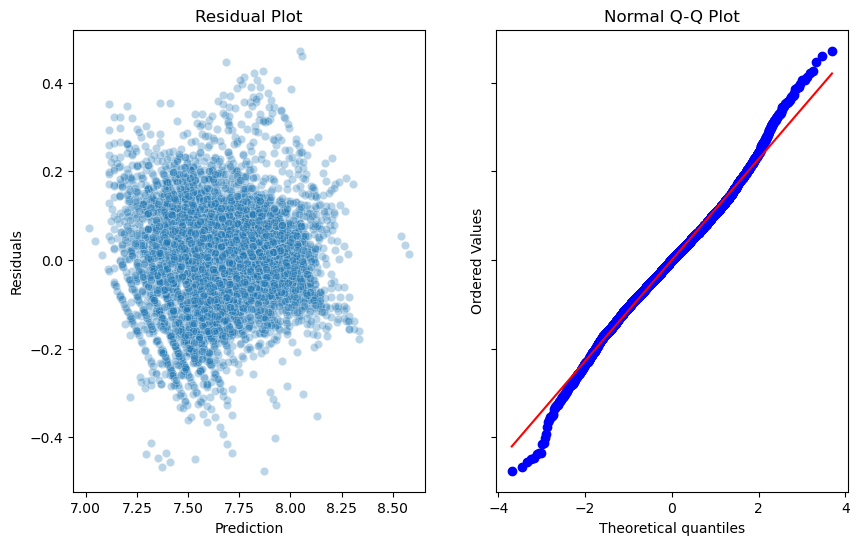

In [14]:
residual_analysis_plots(model)

In [19]:
influence = model.get_influence()
inf_summary_df = influence.summary_frame()
inf_summary_df.head()

,dfb_const,dfb_ram,dfb_ram2,dfb_speed,dfb_hd,dfb_hd2,dfb_screen,dfb_ads,dfb_trend,dfb_trend2,dfb_premium_flag,dfb_multi_flag,dfb_cd_flag,cooks_d,standard_resid,hat_diag,dffits_internal,student_resid,dffits
0,-0.028932,-0.006375,0.005307,0.020054,0.023927,-0.019302,0.004238,0.006062,0.036361,-0.030932,-0.005056,0.003254,-0.015473,0.000695,-1.963549,0.002339,-0.095069,-1.963998,-0.095091
1,-0.003670,0.003820,-0.003571,0.000795,-0.000345,0.000584,0.000401,0.000754,0.004669,-0.003629,-0.000432,0.000451,-0.002370,0.000010,-0.228125,0.002504,-0.011430,-0.228108,-0.011429
2,-0.005492,0.023005,-0.018810,0.030402,-0.013072,0.013403,-0.026956,0.003424,0.052687,-0.041888,-0.002432,0.000222,-0.015098,0.000987,-2.335992,0.002347,-0.113293,-2.336826,-0.113334
3,-0.086124,-0.062784,0.053506,0.040752,0.030816,-0.021523,0.022191,0.012836,0.079445,-0.067041,0.156305,-0.011388,-0.026444,0.004269,-3.525855,0.004445,-0.235583,-3.529087,-0.235799
4,0.017676,0.017346,-0.008190,-0.010890,-0.001704,-0.006258,-0.009592,-0.000343,-0.023469,0.020531,-0.003160,0.004154,-0.006904,0.000286,1.095261,0.003093,0.061006,1.095279,0.061007


### Outliers & Influence

In [20]:
# no outliers

inf_summary_df['cooks_d'].sort_values(ascending=False).head()

3783    0.040433
4477    0.032281
5960    0.025656
6225    0.008716
79      0.006885
Name: cooks_d, dtype: float64

### Multicollinearity

In [18]:
from statsmodels.stats.outliers_influence import variance_inflation_factor as vif

variables = sm.OLS(y, X).exog

pd.Series(
    [vif(variables, i) for i in range(variables.shape[1])],
    index=X.columns
)

const           303.308895
ram              27.951395
ram2             23.944253
speed             1.335423
hd               24.656277
hd2              18.249698
screen            1.088338
ads               4.248554
trend            52.300654
trend2           63.172539
premium_flag      1.122702
multi_flag        1.291816
cd_flag           1.912679
dtype: float64